In [1]:
LOOKUP_TABLE = "../data/wiki.zh.vec"
import gensim
from gensim.models import KeyedVectors

In [2]:
w2v_model = KeyedVectors.load_word2vec_format(LOOKUP_TABLE)
words = []
for word in w2v_model.vocab:
    words.append(word)
print("Number of tokens: {}".format(len(words)))
print("Dimensions of a word vector: {}".format(len(w2v_model[words[0]])))

Number of tokens: 332647
Dimensions of a word vector: 300


In [3]:
DATA_PICKLE = "../pickle/sentence_dict.pickle"

In [4]:
import pickle
sentence_dict = {}
with open(DATA_PICKLE, 'rb') as f:
    sentence_dict = pickle.load(f)

In [5]:
from ckip import CkipSegmenter
segmenter = CkipSegmenter()
import numpy as np
import string
exclude = set(string.punctuation+'，'+'。'+'、'+'「'+'」'+'？'+'！')
def sentence2vec(sentence):
    vector = np.zeros((w2v_model[words[0]].shape))
    oov_num = 0
    token_sentence = segmenter.seg(sentence)
    token_sentence = token_sentence.tok
    token_sentence = [t for t in token_sentence if not t in exclude]
    for token in token_sentence:
        if token in w2v_model.vocab:
            vector += w2v_model[token]
        else:
            oov_num += 1
    vector /= len(token_sentence)
    return vector, oov_num, token_sentence

In [6]:
sv_dict = {}
oov_dict = {}
sentence_token_dict = {} 

In [9]:
for k, s in sentence_dict.items():
    sv, oov, sentence_token = sentence2vec(s)
    print(k)
    sv_dict[k] = sv
    oov_dict[k] = oov
    sentence_token_dict[k] = sentence_token

002.
003.
004.
005.
006. 
007.
008.
009.
010.
011.
012.
013.
015.
016.
018.
019.
020.
021.
023.
024.
025.
026.
027.
029.
030.
032.
034.
035.
037.
038.
039.
041.
044.
045.
046.
048.
049.
050.
052.
054.
055.
056.
057.
058.
059.
061.
061_.
063.
064.
065.
066.
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


In [10]:
sv_dict_array = np.asarray([i for i in sv_dict.values()])
sv_dict_array.shape


(102, 300)

In [11]:
# TRAIN AND TEST DATA
DATA_NUM = 102
TEST_NUM = 30
SAMPLE_NUM = 15

test_x = sv_dict_array[:SAMPLE_NUM]
test_x = np.concatenate((test_x, sv_dict_array[-SAMPLE_NUM:]))
test_y = np.zeros(TEST_NUM)
test_y[SAMPLE_NUM:] = 1
train_x = sv_dict_array[SAMPLE_NUM:DATA_NUM-SAMPLE_NUM]
train_y = np.zeros(DATA_NUM-TEST_NUM)
train_y[51-SAMPLE_NUM:] = 1

print("Test size: {}".format(test_x.shape))
print("Train size: {}".format(train_x.shape))

Test size: (30, 300)
Train size: (72, 300)


In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=300)
forest = forest.fit(train_x, train_y)

In [13]:
result = forest.predict(test_x)

In [14]:
print("Test dementia: {}".format(result[:SAMPLE_NUM]))
print("Test control: {}".format(result[-SAMPLE_NUM:]))

Test dementia: [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
Test control: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [15]:
sv_dict_array.shape

(102, 300)

In [16]:
from sklearn import tree

In [17]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(train_x, train_y)

In [18]:
decision_tree_result = decision_tree.predict(test_x)

In [19]:
print("Test dementia: {}".format(decision_tree_result[:SAMPLE_NUM]))
print("Test control: {}".format(decision_tree_result[-SAMPLE_NUM:]))

Test dementia: [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
Test control: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [20]:
import sys
!{sys.executable} -m pip install graphviz
import graphviz

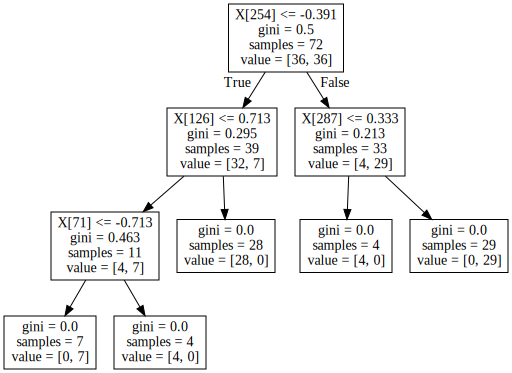

In [21]:
dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph
# graph.render('dementia') # save as pdf file

In [22]:
from sklearn.svm import SVC

In [23]:
svm_classifier = SVC()
svm_classifier.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
svm_result = svm_classifier.predict(test_x)

In [25]:
print("Test dementia: {}".format(svm_result[:SAMPLE_NUM]))
print("Test control: {}".format(svm_result[-SAMPLE_NUM:]))

Test dementia: [0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.]
Test control: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [27]:
knn_result = knn.predict(test_x)

In [28]:
print("Test dementia: {}".format(knn_result[:SAMPLE_NUM]))
print("Test control: {}".format(knn_result[-SAMPLE_NUM:]))

Test dementia: [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Test control: [1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [29]:
print(forest.score(test_x, test_y))
print(decision_tree.score(test_x, test_y))
print(svm_classifier.score(test_x, test_y))
print(knn.score(test_x, test_y))

0.8333333333333334
0.8333333333333334
0.7
0.7666666666666667


In [30]:
from sklearn.model_selection import train_test_split
X = sv_dict_array
Y = np.zeros(DATA_NUM)
Y[52:] = 1
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4)

In [31]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.81818182 0.90909091 0.7        0.8        0.8        0.5
 0.9        0.9        0.8        0.8       ]
0.7927272727272727


/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
scores = cross_val_score(decision_tree, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.81818182 0.36363636 0.8        0.8        0.6        0.8
 0.5        0.7        0.8        1.        ]
0.7181818181818181


In [33]:
scores = cross_val_score(forest, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.90909091 0.81818182 0.9        1.         1.         0.8
 0.9        1.         0.9        0.8       ]
0.9027272727272727


In [56]:
scores = cross_val_score(svm_classifier, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.54545455 0.54545455 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5       ]
0.509090909090909


In [57]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
scores = cross_val_score(logistic, X, Y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.90909091 0.90909091 0.9        1.         1.         0.9
 0.9        1.         0.8        0.9       ]
0.9218181818181819


In [52]:
from sklearn import linear_model
bayes = linear_model.BayesianRidge()
bayes.fit(train_x, train_y)
scores = bayes.score(train_x, train_y)
print(scores)
bayes_result = bayes.predict(test_x)
print(np.round(bayes_result[:SAMPLE_NUM]))
print(np.round(bayes_result[-SAMPLE_NUM:]))

0.9325271920409555
[ 0. -0. -0.  0.  0. -0.  0.  1.  1.  0.  0. -0. -0.  0.  0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
import pickle
sentence2vec_array = sv_dict_array
file = open('s2v_array.pickle', 'wb')
pickle.dump(sentence2vec_array, file)
file.close()